#### Premium amount analysis (OLS)

In [1]:
#importing Labirary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Data.csv")

In [4]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [5]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [6]:
df.shape

(278860, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [8]:
df.isnull().sum()

Age                      4685
Gender                      0
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Education Level             0
Occupation              81288
Health Score            10597
Location                    0
Policy Type                 0
Previous Claims         81288
Vehicle Age                 0
Credit Score            27886
Insurance Duration          0
Premium Amount           1841
Policy Start Date           0
Customer Feedback       18349
Smoking Status              0
Exercise Frequency          0
Property Type               0
dtype: int64

In [9]:
def null_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    return percent_missing

In [10]:
null_percentage(df)

Age                      1.680055
Gender                   0.000000
Annual Income            5.004303
Marital Status           1.799828
Number of Dependents    10.000000
Education Level          0.000000
Occupation              29.150111
Health Score             3.800115
Location                 0.000000
Policy Type              0.000000
Previous Claims         29.150111
Vehicle Age              0.000000
Credit Score            10.000000
Insurance Duration       0.000000
Premium Amount           0.660188
Policy Start Date        0.000000
Customer Feedback        6.580004
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

In [11]:
# df['Previous Claims'] = df['Previous Claims'].fillna(0)

In [12]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [13]:
#df['Occupation'] = df['Occupation'].fillna('Unemployed')

In [14]:
df['Gender'] = df['Gender'].replace({'Male':1 , 'Female':0})
df['Smoking Status'] = df['Smoking Status'].replace({'Yes':1, 'No':0})

In [15]:
df.duplicated().sum()

0

In [16]:
null_percentage(df)

Age                      1.680055
Gender                   0.000000
Annual Income            5.004303
Marital Status           1.799828
Number of Dependents    10.000000
Education Level          0.000000
Occupation              29.150111
Health Score             3.800115
Location                 0.000000
Policy Type              0.000000
Previous Claims         29.150111
Vehicle Age              0.000000
Credit Score            10.000000
Insurance Duration       0.000000
Premium Amount           0.660188
Policy Start Date        0.000000
Customer Feedback        6.580004
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(92985, 20)

In [19]:
df.isna().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Premium Amount          0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92985 entries, 3 to 278854
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   92985 non-null  float64
 1   Gender                92985 non-null  int64  
 2   Annual Income         92985 non-null  float64
 3   Marital Status        92985 non-null  object 
 4   Number of Dependents  92985 non-null  float64
 5   Education Level       92985 non-null  object 
 6   Occupation            92985 non-null  object 
 7   Health Score          92985 non-null  float64
 8   Location              92985 non-null  object 
 9   Policy Type           92985 non-null  object 
 10  Previous Claims       92985 non-null  float64
 11  Vehicle Age           92985 non-null  int64  
 12  Credit Score          92985 non-null  float64
 13  Insurance Duration    92985 non-null  int64  
 14  Premium Amount        92985 non-null  float64
 15  Policy Start Date 

In [21]:
df['Exercise Frequency'].head()

3      Rarely
5       Daily
6     Monthly
8      Rarely
11     Rarely
Name: Exercise Frequency, dtype: object

In [22]:
df.describe()

,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Smoking Status
count,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000,92985.000000
mean,41.014121,0.500285,42098.392095,2.000635,28.584177,0.997720,9.488434,574.973544,5.013206,969.799226,0.501113
std,13.552250,0.500003,35484.380179,1.412383,16.011769,1.000675,5.763703,158.820093,2.580619,912.589025,0.500001
min,18.000000,0.000000,0.000000,0.000000,0.116550,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000
25%,29.000000,0.000000,13614.000000,1.000000,16.082971,0.000000,4.000000,438.000000,3.000000,288.000000,0.000000
50%,41.000000,1.000000,32138.000000,2.000000,26.448279,1.000000,9.000000,575.000000,5.000000,691.000000,1.000000
75%,53.000000,1.000000,62119.000000,3.000000,39.021673,2.000000,14.000000,713.000000,7.000000,1371.000000,1.000000
max,64.000000,1.000000,149996.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000,1.000000


In [23]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
3,60.0,0,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,0,Rarely,Condo
5,38.0,1,31769.0,Married,1.0,Bachelor's,Employed,14.736611,Rural,Comprehensive,1.0,9,521.0,7,4016.0,2020-09-16 15:21:39.078837,Poor,1,Daily,House
6,56.0,0,26209.0,Single,1.0,Master's,Employed,33.238300,Urban,Premium,0.0,10,424.0,5,828.0,2021-03-29 15:21:39.078837,Average,1,Monthly,Condo
8,40.0,1,29471.0,Single,4.0,High School,Unemployed,31.565248,Rural,Basic,1.0,14,796.0,7,975.0,2023-05-03 15:21:39.078837,Poor,0,Rarely,House
11,41.0,0,36427.0,Single,2.0,High School,Self-Employed,13.264415,Suburban,Premium,0.0,11,444.0,9,207.0,2022-02-14 15:21:39.078837,Good,1,Rarely,House


In [24]:
df.drop(axis=1,columns=['Policy Start Date'], inplace=True)

In [25]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
3,60.0,0,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,Poor,0,Rarely,Condo
5,38.0,1,31769.0,Married,1.0,Bachelor's,Employed,14.736611,Rural,Comprehensive,1.0,9,521.0,7,4016.0,Poor,1,Daily,House
6,56.0,0,26209.0,Single,1.0,Master's,Employed,33.238300,Urban,Premium,0.0,10,424.0,5,828.0,Average,1,Monthly,Condo
8,40.0,1,29471.0,Single,4.0,High School,Unemployed,31.565248,Rural,Basic,1.0,14,796.0,7,975.0,Poor,0,Rarely,House
11,41.0,0,36427.0,Single,2.0,High School,Self-Employed,13.264415,Suburban,Premium,0.0,11,444.0,9,207.0,Good,1,Rarely,House


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92985 entries, 3 to 278854
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   92985 non-null  float64
 1   Gender                92985 non-null  int64  
 2   Annual Income         92985 non-null  float64
 3   Marital Status        92985 non-null  object 
 4   Number of Dependents  92985 non-null  float64
 5   Education Level       92985 non-null  object 
 6   Occupation            92985 non-null  object 
 7   Health Score          92985 non-null  float64
 8   Location              92985 non-null  object 
 9   Policy Type           92985 non-null  object 
 10  Previous Claims       92985 non-null  float64
 11  Vehicle Age           92985 non-null  int64  
 12  Credit Score          92985 non-null  float64
 13  Insurance Duration    92985 non-null  int64  
 14  Premium Amount        92985 non-null  float64
 15  Customer Feedback 

In [27]:
# float_columns = df.select_dtypes(include='float').columns 
# float_columns = df.dtypes[df.dtypes == "float64"].index
# int_index = df.dtypes[df.dtypes == 'int64'].index
# print(float_columns,int_index)

numerical_cols = df.select_dtypes(include=['number']).columns

### Preprocessing

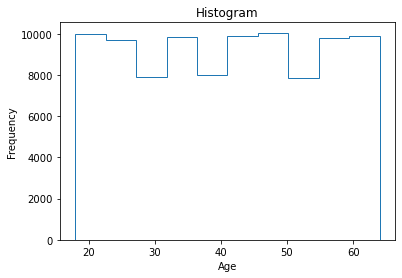

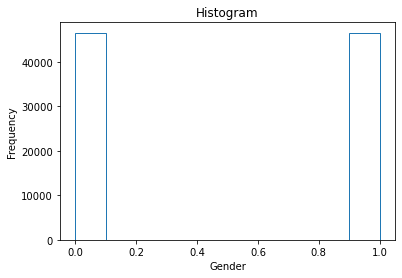

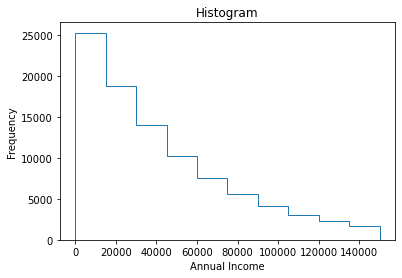

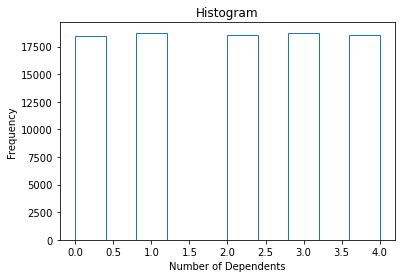

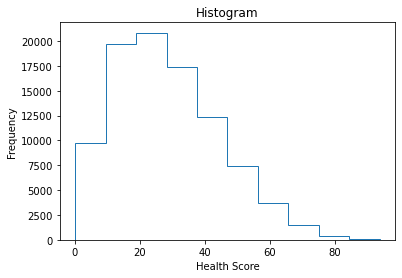

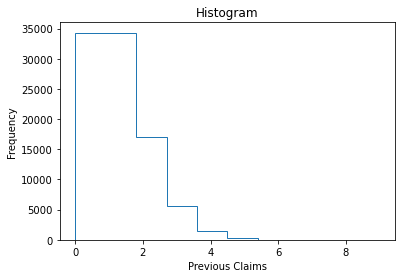

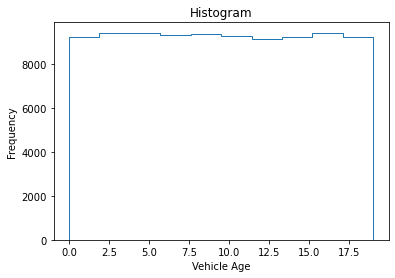

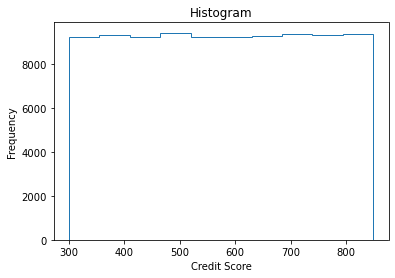

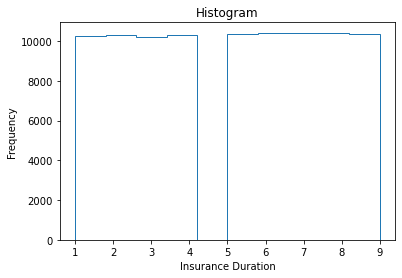

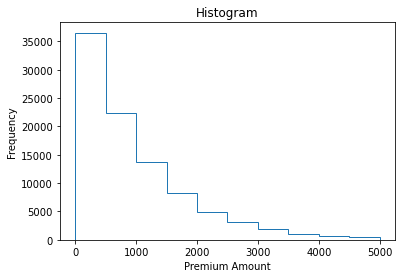

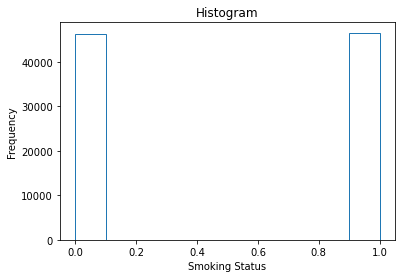

In [28]:
for i in numerical_cols:
    plt.hist(df[str(i)], bins=10, histtype='step')
    plt.xlabel(str(i))
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

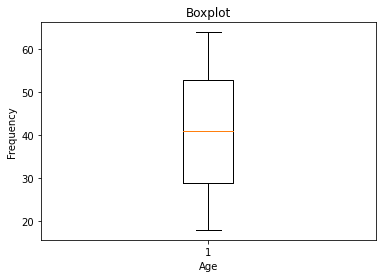

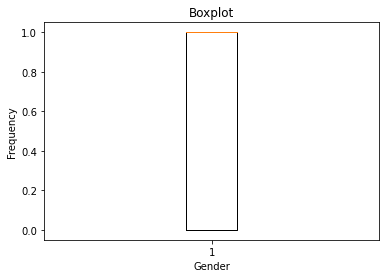

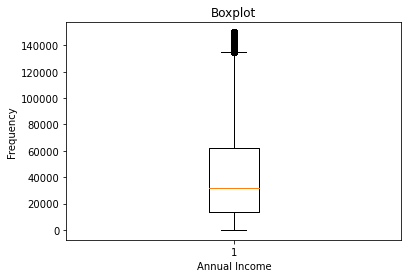

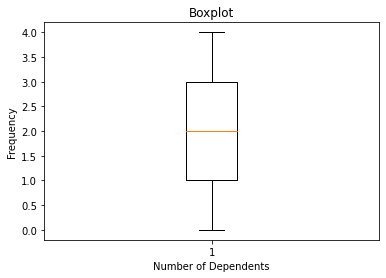

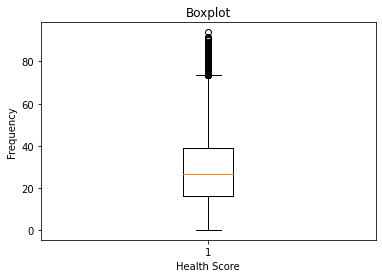

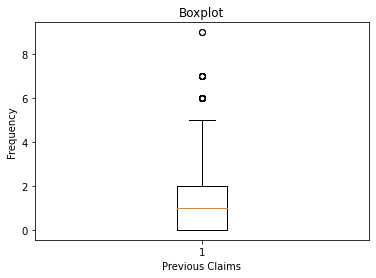

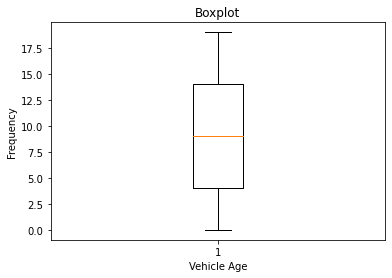

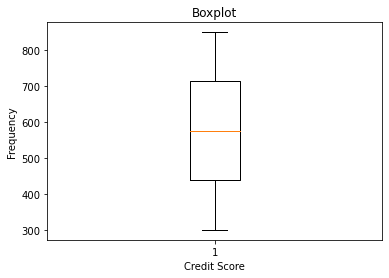

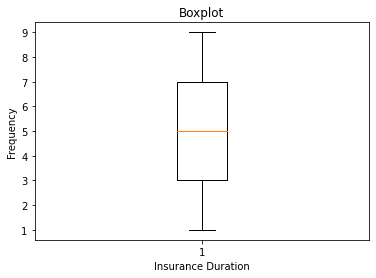

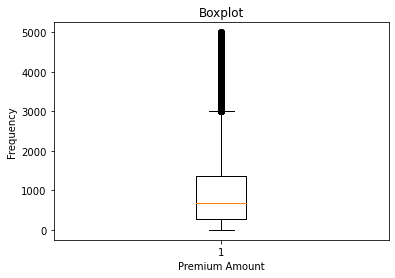

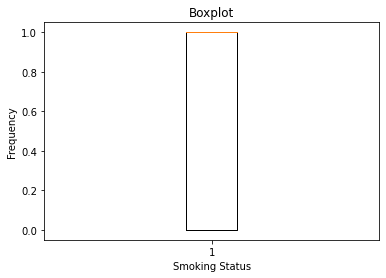

In [29]:
for i in numerical_cols:
    plt.boxplot(df[str(i)] )
    plt.xlabel(str(i))
    plt.ylabel('Frequency')
    plt.title('Boxplot')
    plt.show()

In [30]:
Q3_PA = df['Premium Amount'].quantile(0.75) 
Q1_PA = df['Premium Amount'].quantile(0.25) 
IQR_PA = Q3_PA-Q1_PA
print(IQR_PA)

1083.0


In [31]:
lower_bound = Q1_PA - 1.5 * IQR_PA
upper_bound = Q3_PA + 1.5 * IQR_PA
df = df.loc[(df['Premium Amount'] >= lower_bound) & (df['Premium Amount'] <= upper_bound)]

In [32]:
Q3_AI = df['Annual Income'].quantile(0.75) 
Q1_AI = df['Annual Income'].quantile(0.25) 
IQR_AI = Q3_AI-Q1_AI
lower_bound = Q1_AI - 1.5 * IQR_AI
upper_bound = Q3_AI + 1.5 * IQR_AI

In [33]:
df = df.loc[(df['Annual Income'] >= lower_bound) & (df['Annual Income'] <= upper_bound)]

In [34]:
Q3_HS = df['Health Score'].quantile(0.75) 
Q1_HS = df['Health Score'].quantile(0.25) 
IQR_HS = Q3_HS-Q1_HS
lower_bound_HS = Q1_HS - 1.5 * IQR_HS
upper_bound_HS = Q3_HS + 1.5 * IQR_HS

In [35]:
df = df.loc[(df['Health Score'] >= lower_bound_HS) & (df['Health Score'] <= upper_bound_HS)]

In [36]:
df.shape

(86700, 19)

In [37]:
#df = df[df['Premium Amount'] < (Q3+1.5*IQR_PA)]

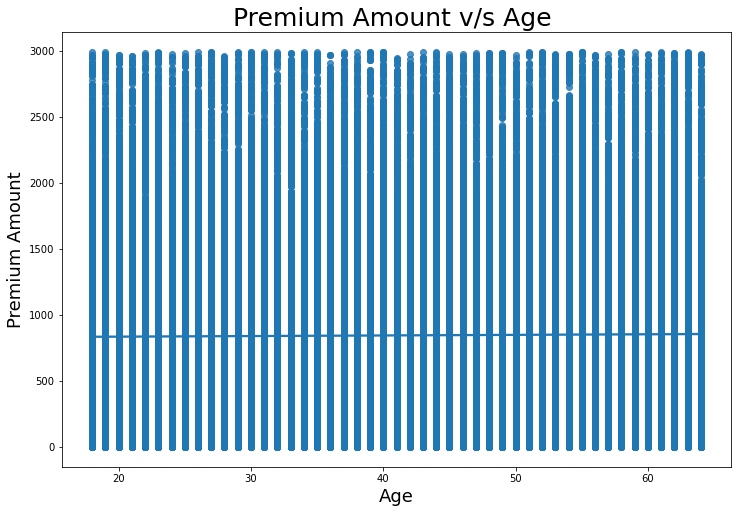

In [38]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="Age", y="Premium Amount")
plt.ylabel("Premium Amount", fontsize = 18)
plt.xlabel("Age", fontsize = 18)
plt.title("Premium Amount v/s Age ",fontsize = 25)
plt.show()

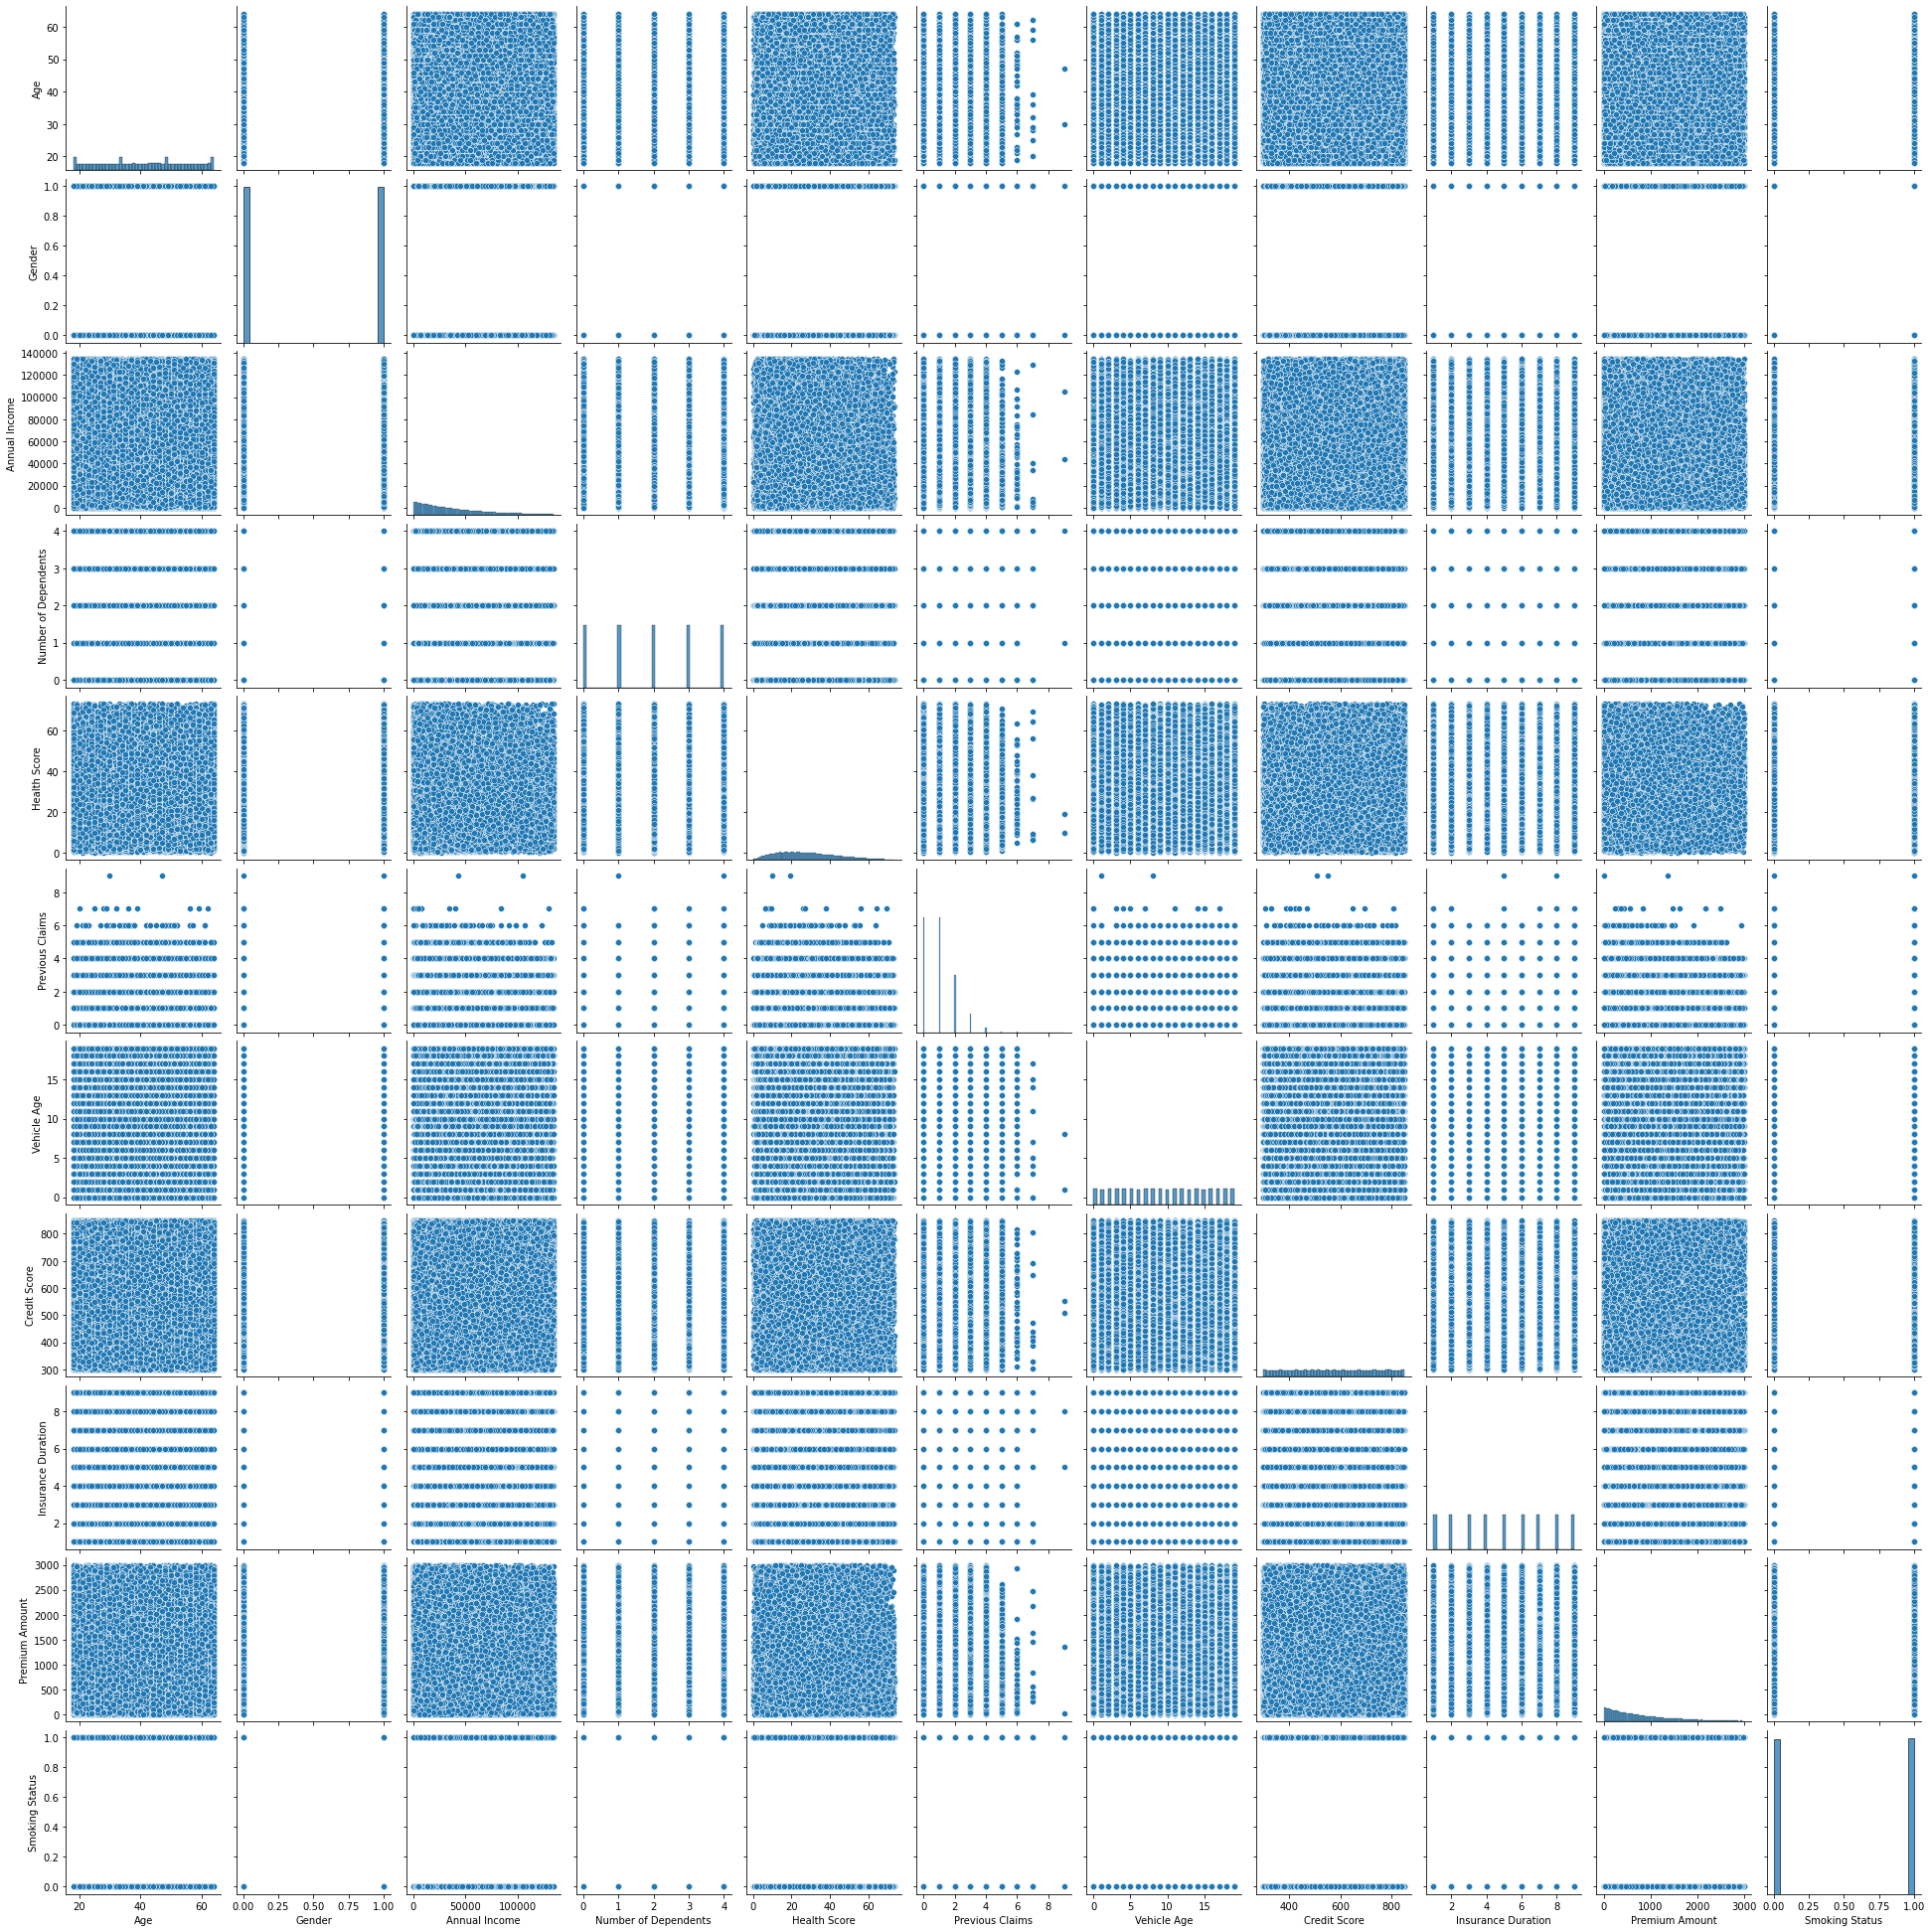

In [39]:
sns.pairplot(df)

In [40]:
from scipy.stats import zscore
#numerical_cols = df.select_dtypes(include=['number']).columns

In [41]:
df[numerical_cols] = df[numerical_cols].apply(zscore)

In [42]:
#number of Unique values in columns
unique_values = df['Policy Type'].unique()
print(unique_values)

['Comprehensive' 'Premium' 'Basic']


In [43]:
from sklearn.preprocessing import OrdinalEncoder
#Ordinal Data 
order = [['Basic','Comprehensive','Premium']]
#label encoder
encoder = OrdinalEncoder(categories=order)
df['Policy Type encoded'] = encoder.fit_transform(df[['Policy Type']]) + 1 # Add 1 to start from 1

In [44]:
df.drop(columns=['Policy Type'], inplace=True)

In [45]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Policy Type encoded
3,1.401064,-1.001246,0.249045,Divorced,-1.415125,PhD,Self-Employed,-0.187967,Rural,0.002711,0.261175,-1.542179,0.771816,0.114385,Poor,-1.002656,Rarely,Condo,2.0
6,1.105844,-1.001246,-0.423218,Single,-0.707191,Master's,Employed,0.319821,Urban,-0.997564,0.087671,-0.950250,-0.002958,-0.024908,Average,0.997351,Monthly,Condo,3.0
8,-0.075033,0.998755,-0.324269,Single,1.416611,High School,Unemployed,0.212165,Rural,0.002711,0.781689,1.392274,0.771816,0.181921,Poor,-1.002656,Rarely,House,1.0
11,-0.001228,-1.001246,-0.113265,Single,0.000743,High School,Self-Employed,-0.965442,Suburban,-0.997564,0.261175,-0.824308,1.546591,-0.898655,Good,0.997351,Rarely,House,3.0
17,-1.624935,0.998755,-0.981638,Divorced,-1.415125,PhD,Self-Employed,0.376007,Urban,-0.997564,1.649212,-0.799120,-1.552507,-1.188497,Poor,-1.002656,Rarely,House,2.0


In [46]:
#categorical data
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [47]:
df.head()

,Age,Gender,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Smoking Status,Policy Type encoded,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Customer Feedback_Good,Customer Feedback_Poor,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
3,1.401064,-1.001246,0.249045,-1.415125,-0.187967,0.002711,0.261175,-1.542179,0.771816,0.114385,-1.002656,2.0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
6,1.105844,-1.001246,-0.423218,-0.707191,0.319821,-0.997564,0.087671,-0.950250,-0.002958,-0.024908,0.997351,3.0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
8,-0.075033,0.998755,-0.324269,1.416611,0.212165,0.002711,0.781689,1.392274,0.771816,0.181921,-1.002656,1.0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1
11,-0.001228,-1.001246,-0.113265,0.000743,-0.965442,-0.997564,0.261175,-0.824308,1.546591,-0.898655,0.997351,3.0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1
17,-1.624935,0.998755,-0.981638,-1.415125,0.376007,-0.997564,1.649212,-0.799120,-1.552507,-1.188497,-1.002656,2.0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1


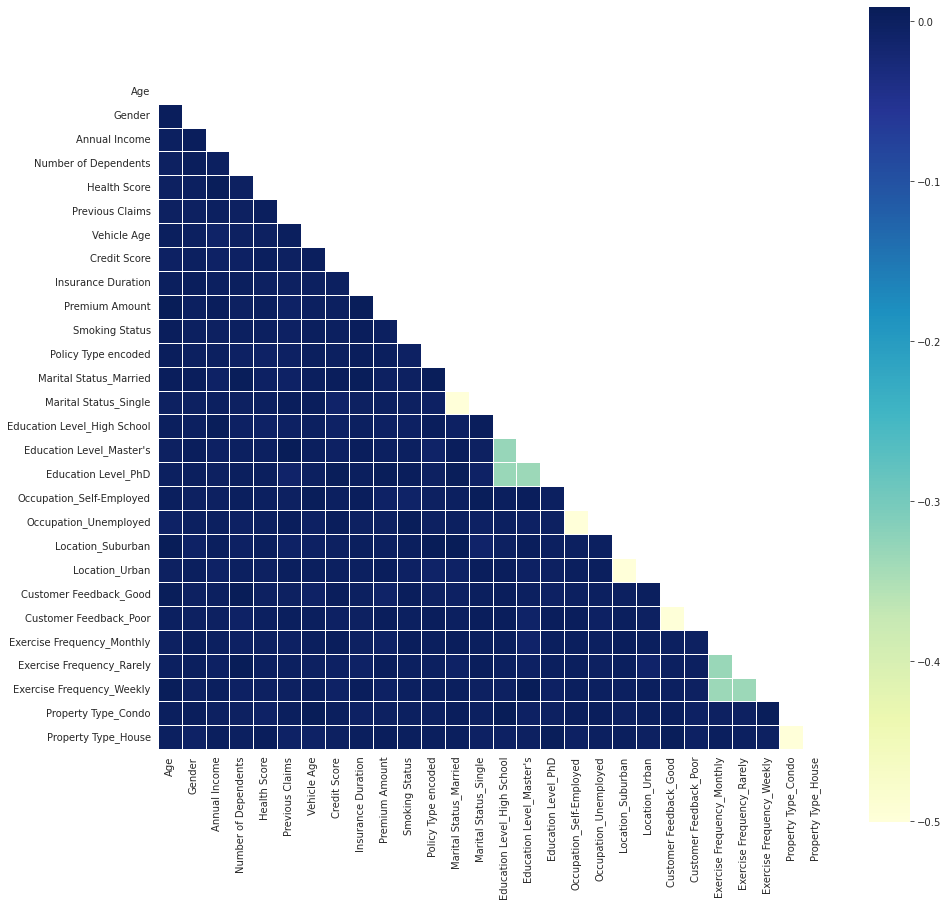

In [48]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

In [49]:
x = df.drop(columns=['Premium Amount']) 
y = df['Premium Amount']

### Modelling

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, x_test, Y_Train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
print(len(X_train),len(Y_Train),len(x_test),len(y_test))

69360 69360 17340 17340


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,Y_Train)

LinearRegression()

In [56]:
model.predict(x_test)

array([-0.00167425,  0.00211196, -0.01801814, ...,  0.00121889,
        0.01956082, -0.00912442])

In [57]:
print(y_test)

154422   -0.770618
98663    -1.092821
189050   -0.887399
271573    0.927632
277112    0.103129
            ...   
184326    1.769018
196586    0.522416
260457    0.295888
127554    1.805600
14465    -0.888806
Name: Premium Amount, Length: 17340, dtype: float64


In [58]:
model.score(x_test,y_test)

-0.00011801333755889765

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
random_search = RandomizedSearchCV(lasso, param_dist, n_iter=10, cv=5)
random_search.fit(X_train, Y_Train)

c:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [60]:
print(random_search.score(x_test, y_test))
print("Best parameters found: ", random_search.best_params_)

-6.01547121485968e-05
Best parameters found:  {'alpha': 0.1}


In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_dist_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
random_search_ridge = RandomizedSearchCV(ridge, param_dist_ridge, n_iter=10, cv=5)

In [62]:
best_ridge = random_search_ridge
best_ridge.fit(X_train, Y_Train)

c:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [63]:
best_ridge.score(x_test, y_test)

-0.0001149591410909423

In [64]:
#Grid Search for Ridge Regression
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, Y_Train)
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'alpha': 100.0}
Best score:  -0.000696774208189499


In [65]:
# grid search for Lasso Regression
lasso = Lasso()
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, Y_Train)
print("Best parameters for Lasso found: ", grid_search_lasso.best_params_)
print("Best score for Lasso: ", grid_search_lasso.best_score_)

Best parameters for Lasso found:  {'alpha': 0.1}
Best score for Lasso:  -0.00011482301969709675


## XGBoost

In [66]:
import xgboost as xgb

In [67]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5)

In [68]:
xgb_model.fit(X_train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred =xgb_model.predict(x_test)

In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0166675814232706


In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.03230506954658807
